In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_Sioux

In [2]:
numNodes = Compute_Jacobian_Sioux.numNodes;
numLinks = Compute_Jacobian_Sioux.numLinks;
numZones = Compute_Jacobian_Sioux.numZones;
numODpairs = Compute_Jacobian_Sioux.numODpairs;
od_pairs = Compute_Jacobian_Sioux.od_pairs;
link_list_js = Compute_Jacobian_Sioux.link_list_js;
link_length_list = Compute_Jacobian_Sioux.link_length_list;

In [3]:
include("../Julia_files/initia_data.jl");
include("prepare_data_Sioux.jl");
include("extract_data_Sioux.jl");
include("../Julia_files/tap_MSA.jl");
include("../Julia_files/inverseVI.jl");
include("../Julia_files/demands_adjustment_gradi.jl");

In [4]:
fcoeffs = [1, 0, 0, 0, .15];

# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA(demandsDict[0], fcoeffs);

In [5]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/Sioux_net.txt", tapFlowDicDict[0]);

In [6]:
deg = 9
c = 4.0
lam = 10.0^3

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDict[0], arcsDict[0]);

In [7]:
coeffs_dict

Dict{Any,Any} with 1 entry:
  (9,4.0,1000.0,1) => [1.0,0.000535976,-0.0229538,0.0589271,0.0897727,0.026762,…

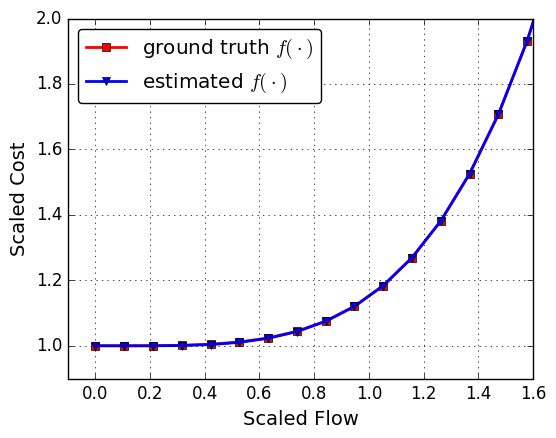

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'rm'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [8]:
using PyPlot

PyPlot.figure(figsize=(6, 4.5))

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, 1)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=2)
PyPlot.plot(xs, zs, "v-b", label=L"estimated $f(\cdot)$", linewidth=2)

legend(loc="upper left", fancybox="true", numpoints=1) 

grid("on")
xlim(-0.1, 1.6);
ylim(0.9, 2.0);

font1 = Dict("family"=>"rm","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_1.pdf")

In [9]:
outfile = open("./results/coeffs_dict.json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

In [10]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [11]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)